In [209]:
#Webscrape mobiltelefonernes navne og priser fra Komplett.dk
#https://www.komplett.dk/category/21064/mobil/mobiltelefoner
import requests
import bs4
import re
import csv  

# 1
url = "https://www.komplett.dk/category/21064/mobil/mobiltelefoner?nlevel=10444%C2%A721064&hits=1000"

headers = requests.utils.default_headers()

headers.update(
    {
        'User-Agent': 'My User Agent 1.0',
    }
)

res = requests.get(url, headers=headers)

res.raise_for_status()

soup = bs4.BeautifulSoup(res.text, 'html.parser')

all_products = soup.select('div[class=text-content] > h2')


all_prices = soup.select('span.product-price-now')


products_komplett = []

for product, price in zip(all_products, all_prices):
    products_komplett.append((product.text, int(re.sub('[.,-]', '', price.text))))


 
    
header = ['name', 'price']
with open("komplett.csv", "w", newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(i for i in header)
    for j in products_komplett:
        writer.writerow(j)


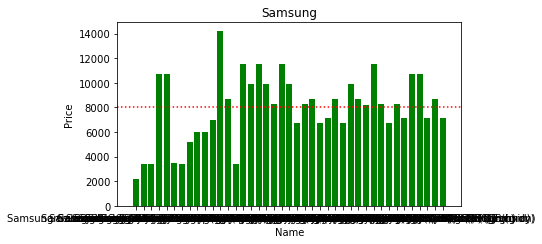

In [291]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
#Plot gennemsnitpriserne på Samsung og Iphone i et bar-graf eller linjediagram


 
df = pd.read_csv("komplett.csv")




Samsung = df[df['name'].str.contains("Samsung")]
Iphone = df[df['name'].str.contains("iPhone")].mean()


X = list(Samsung.iloc[:, 0])
Y = list(Samsung.iloc[:, 1])


t=8000
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Samsung")
plt.xlabel("Name")
plt.ylabel("Price")

plt.axhline(t, color='red', ls='dotted')

# Show the plot
plt.show()




In [52]:
#Webscrape mobiltelefonernes navne og priser fra Telia.dk
#https://www.telia.dk/privat/webshop/mobiler/?page=4


In [20]:
#Sammenlign mobilernes priser fra begge butikker og plot dem.